In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
heart = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
heart.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [6]:
heart.shape

(1190, 12)

In [7]:
heart.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [8]:
heart.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [9]:
print(heart.isnull())

        age    sex  chest pain type  resting bp s  cholesterol  \
0     False  False            False         False        False   
1     False  False            False         False        False   
2     False  False            False         False        False   
3     False  False            False         False        False   
4     False  False            False         False        False   
...     ...    ...              ...           ...          ...   
1185  False  False            False         False        False   
1186  False  False            False         False        False   
1187  False  False            False         False        False   
1188  False  False            False         False        False   
1189  False  False            False         False        False   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                   False        False           False            False   
1                   False        False           False   

<Axes: >

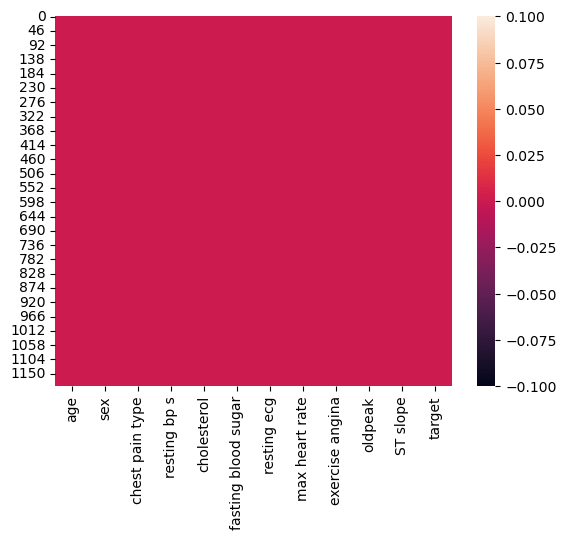

In [10]:
sns.heatmap(heart.isnull())

Negative (0): 629
Positive (1): 561


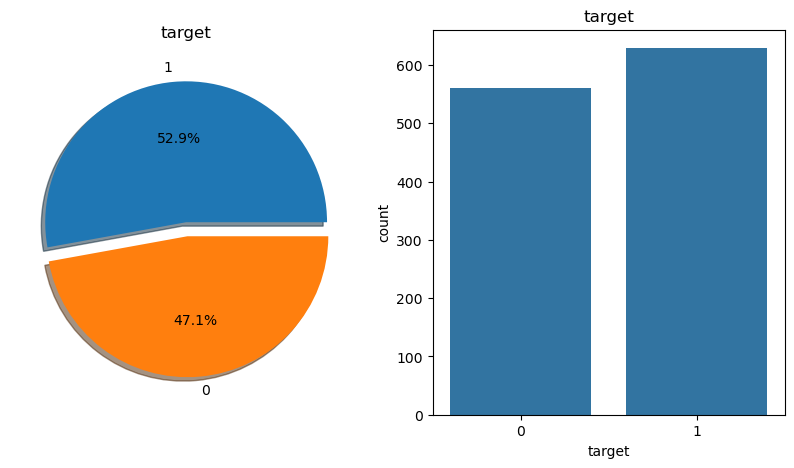

In [11]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
diagnosis_counts = heart['target'].value_counts()
diagnosis_counts.plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='target', data=heart, ax=ax[1])
ax[1].set_title('target')
N, P = diagnosis_counts
print('Negative (0):', N)
print('Positive (1):', P)

In [12]:
print(heart.corr())

                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.015096         0.149055      0.257692   
sex                  0.015096  1.000000         0.138405     -0.006443   
chest pain type      0.149055  0.138405         1.000000      0.009466   
resting bp s         0.257692 -0.006443         0.009466      1.000000   
cholesterol         -0.046472 -0.208441        -0.109396      0.099037   
fasting blood sugar  0.178923  0.110961         0.076492      0.088235   
resting ecg          0.194595 -0.022225         0.035705      0.095860   
max heart rate      -0.368676 -0.181837        -0.337491     -0.101357   
exercise angina      0.188095  0.194380         0.403428      0.142435   
oldpeak              0.245093  0.096390         0.224106      0.176111   
ST slope             0.237749  0.127913         0.276949      0.089384   
target               0.262029  0.311267         0.460127      0.121415   

                     cholesterol  fas

<Axes: >

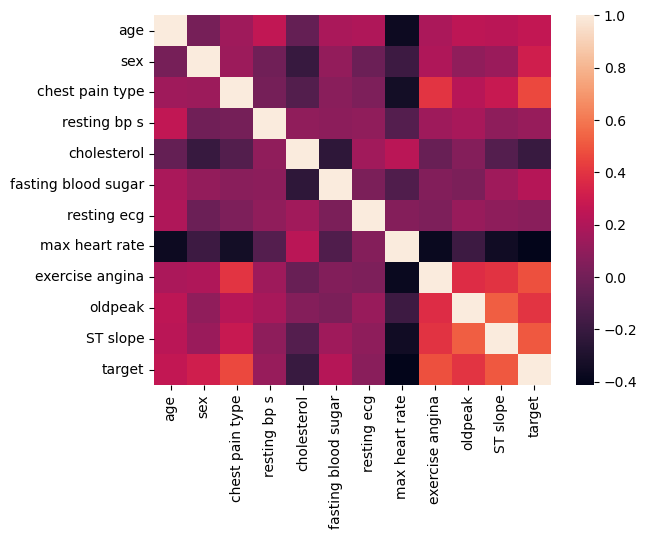

In [13]:
sns.heatmap(heart.corr())

In [14]:
heart['target'].shape

(1190,)

In [15]:
heart['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [16]:
x= heart.drop(columns='target',axis=1)
y= heart['target']

In [17]:
print(x)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [18]:
print(y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(1190, 11) (952, 11) (238, 11)


In [21]:
print(y.shape,y_train.shape,y_test.shape)

(1190,) (952,) (238,)


In [22]:
model= LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
prediction= model.predict(x_test)
print(prediction)

[0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1]


In [24]:
accuracy= accuracy_score(prediction,y_test)
print(accuracy)

0.8277310924369747


In [25]:
import pickle
pickle.dump(model,open('heart.pkl','wb'))